In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb
from xgboost import XGBRegressor

In [2]:
# Importing unnormalized data from pre-processing
X_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_cancer")
X_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_cancer")
y_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_cancer")
y_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_cancer")

In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54242, 12) (54242, 2) (18081, 12) (18081, 2)


In [4]:
print(type(y_train), type(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [5]:
y_train.head()

,CensusTract,Cancer_prevalence
0,12095017016,6.0
1,36103146206,5.2
2,39061009600,5.6
3,6073003211,5.1
4,47131965400,7.2


In [6]:
X_train.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,12095017016,8.947239,34.461667,0.596474,36.469769,0.562358,43.101867,0.009710,0.045227,0.800494,0.623067,0.000054
1,36103146206,6.644049,43.633522,0.642413,25.487909,0.358018,2258.124038,0.465510,0.252945,0.226540,2.069586,0.000000
2,39061009600,9.685161,46.267325,0.936223,32.655827,0.464191,332.589894,0.635153,0.054070,1.889720,1.248625,0.013151
3,6073003211,9.586768,43.133933,0.434802,37.630175,0.497908,24.201700,0.524065,0.013390,0.465606,2.723068,49.829670
4,47131965400,8.154197,43.808219,0.199462,29.096532,0.412679,50.144269,0.233456,0.016974,0.587134,0.061471,0.001203


In [7]:
# Dropping extra column
X_test.set_index('CensusTract', inplace=True)
X_train.set_index('CensusTract', inplace=True)
y_test.set_index('CensusTract', inplace=True)
y_train.set_index('CensusTract', inplace=True)

In [8]:
# Getting the y-data into correct shape for model
y_test = np.ravel(y_test)
y_train = np.ravel(y_train)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(54242, 11) (54242,) (18081, 11) (18081,)


In [9]:
X_train.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
12095017016,8.947239,34.461667,0.596474,36.469769,0.562358,43.101867,0.009710,0.045227,0.800494,0.623067,0.000054
36103146206,6.644049,43.633522,0.642413,25.487909,0.358018,2258.124038,0.465510,0.252945,0.226540,2.069586,0.000000
39061009600,9.685161,46.267325,0.936223,32.655827,0.464191,332.589894,0.635153,0.054070,1.889720,1.248625,0.013151
6073003211,9.586768,43.133933,0.434802,37.630175,0.497908,24.201700,0.524065,0.013390,0.465606,2.723068,49.829670
47131965400,8.154197,43.808219,0.199462,29.096532,0.412679,50.144269,0.233456,0.016974,0.587134,0.061471,0.001203


### Multiple OLS in the EDA notebook found no reasonable correlation. 

### Random Forest Regressor

In [10]:
# Instantiating RandomForestRegressor with default hyperparameters
rf = RandomForestRegressor() 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
y_pred = rf.predict(X_test)

In [12]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.4483711707737428
MAE: 0.9472345003041868
MSE: 1.8591293332780263
RMSE: 1.3634989304278997


### The metrics indicate that this is not a good model

### Now with tuned hyperparameters via randomized search.

In [13]:
# Instantiating RandomForestRegressor with randomized searching for best hyperparameters n_estimators and max_depth
rf = RandomForestRegressor() 
params = {"n_estimators":range(1,500), "max_depth":range(1,30)}

rs = RandomizedSearchCV(rf, params)

In [14]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(1, 30),
                                        'n_estimators': range(1, 500)})

In [15]:
rs.best_estimator_

RandomForestRegressor(max_depth=29, n_estimators=426)

In [16]:
y_pred = rs.predict(X_test)

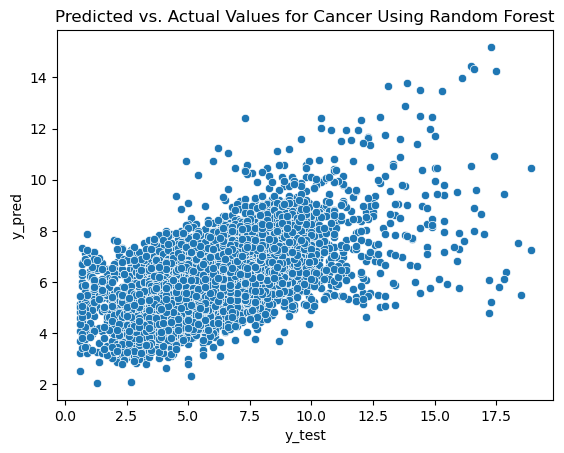

In [17]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for Cancer Using Random Forest")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [18]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.4545963578643404
MAE: 0.9419910914715339
MSE: 1.8381488708509501
RMSE: 1.3557834896660124


### Even with tuning, random forest is still not a good model with the R<sup>2</sup> value of 0.45.

### AdaBoost Regressor

In [19]:
# Instantiating AdaBoostRegressor with default parameters
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [20]:
y_pred = ada.predict(X_test)

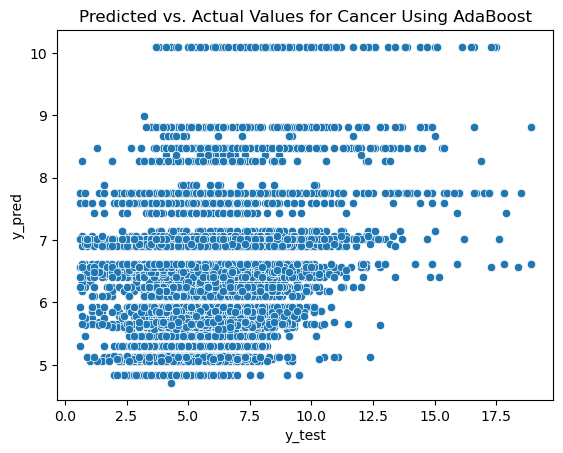

In [21]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for Cancer Using AdaBoost")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [22]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.07264377174881775
MAE: 1.319626066122218
MSE: 3.125426147067262
RMSE: 1.7678874814498975


### Adaboost with the default hyperparameters is not giving reasonable results.

### Now with hyperparameters tuned via randomized search.

In [23]:
# Instantiating AdaBoost Regressor and using randomized search for best hyperparameters n_estimators and learning rate
ada = AdaBoostRegressor()
params = {"n_estimators":range(1,500), "learning_rate":np.arange(1e-3,100)}

rs = RandomizedSearchCV(ada, params)

In [24]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.30...
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01]),
                                        'n_estimators': range(1, 500)})

In [25]:
rs.best_estimator_

AdaBoostRegressor(learning_rate=35.00099999999999, n_estimators=5)

In [26]:
y_pred = rs.predict(X_test)

In [27]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -43.70264173010913
MAE: 12.134280899837847
MSE: 150.6592623740057
RMSE: 12.27433347982715


### The tuning made the results worse. 

### GradientBoost Regressor

In [28]:
# Instantiating GradientBoostRegressor with default parameters
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [29]:
y_pred = gb.predict(X_test)

In [30]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.2728659815608878
MAE: 1.1112799903402784
MSE: 2.4506264199437027
RMSE: 1.5654476739717949


### Now with hyperparameters tuned via randomized search.

In [31]:
# Instantiating GradientBoostingRegressor and using randomized searching for best hyperparameters n_estimators and learning rate
gb = GradientBoostingRegressor()
params = {"n_estimators":range(1,500), "max_leaf_nodes":range(2,100), "learning_rate":np.arange(1e-3, 1)}

rs = RandomizedSearchCV(gb, params)

In [32]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': array([0.001]),
                                        'max_leaf_nodes': range(2, 100),
                                        'n_estimators': range(1, 500)})

In [33]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.001, max_leaf_nodes=20,
                          n_estimators=477)

In [35]:
y_pred = rs.predict(X_test)

In [36]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.1055968860961447
MAE: 1.2937792648767863
MSE: 3.014365777739008
RMSE: 1.7361928976179484


### This is still not as good as Random Forest. 

### XGBoost Regressor

In [37]:
# Instantiating XGBRegressor with default parameters
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [38]:
y_pred = xgb.predict(X_test)

In [39]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.3849977797890971
MAE: 1.0150860281382492
MSE: 2.072713765212288
RMSE: 1.4396922467014568


### This is still not as good as Random Forest.

### Now with hyperparameters tuned via randomized search.

In [40]:
# Instantiating XGBRegressor and randomly searching for best hyperparameters n_estimators and learning rate
xgb = XGBRegressor()
params = {"max_depth": range(1,200), "min_child_weight":range(1,200), "gamma":range(1,200)}

rs = RandomizedSearchCV(xgb, params)

In [41]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...ne,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': range(1, 200),
                                        'max_depth': range(1, 200),
                                        'min_child_weight': range(1, 200)})

In [42]:
rs.best_params_

{'min_child_weight': 133, 'max_depth': 164, 'gamma': 8}

In [43]:
y_pred = rs.predict(X_test)

In [44]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.4235023655494814
MAE: 0.9894794328175421
MSE: 1.9429435264935129
RMSE: 1.3938950916383603


### This is better than XGBoost without tuning the hyperparameters, but it is still not as good as Random Forest. 

### LightGBM Regressor

In [45]:
# Instantiating LGBMRegressor and using RandomizedSearch to determine the best values for reg_alpha and reg_lambda
lgbm = ltb.LGBMRegressor()
params = {"reg_alpha": np.arange(1e-3,100), "reg_lambda": np.arange(1e-3,100)}

rs = RandomizedSearchCV(lgbm, params)

In [46]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'reg_alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.3001e+01, 2...
       6.5001e+01, 6.6001e+01, 6.7001e+01, 6.8001e+01, 6.9001e+01,
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01])})

In [47]:
rs.best_estimator_

LGBMRegressor(reg_alpha=0.001, reg_lambda=46.00099999999999)

In [48]:
y_pred = rs.predict(X_test)

In [49]:
print("R2 score:", r2_score(y_test, y_pred)  )
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.3607949964050612
MAE: 1.0353138238597213
MSE: 2.154283295578112
RMSE: 1.467747694795707


### This is still not as good as Random Forest.

In [9]:
# Importing normalized data
X_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_cancer")
X_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_cancer")
X_train_log.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,12095017016,8.947239,34.461667,0.646471,0.611873,0.902735,-0.865191,-1.399822,-0.487333,0.644248,-0.438624
1,36103146206,6.644049,43.633522,0.762613,-0.580450,-0.461842,1.342187,0.721664,1.473408,-0.579084,0.468851
2,39061009600,9.685161,46.267325,1.332427,0.236359,0.291649,0.119725,1.177841,-0.326823,1.423279,0.070666
3,6073003211,9.586768,43.133933,0.153035,0.719643,0.509977,-1.092271,0.892126,-1.170523,0.079420,0.679510
4,47131965400,8.154197,43.808219,-0.916612,-0.148421,-0.060693,-0.802067,-0.137191,-1.084410,0.319773,-1.278875


In [10]:
# Getting rid of extra column
X_train_log.set_index("CensusTract", inplace=True)
X_test_log.set_index("CensusTract", inplace=True)
X_train_log.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
CensusTract,,,,,,,,,,
12095017016,8.947239,34.461667,0.646471,0.611873,0.902735,-0.865191,-1.399822,-0.487333,0.644248,-0.438624
36103146206,6.644049,43.633522,0.762613,-0.580450,-0.461842,1.342187,0.721664,1.473408,-0.579084,0.468851
39061009600,9.685161,46.267325,1.332427,0.236359,0.291649,0.119725,1.177841,-0.326823,1.423279,0.070666
6073003211,9.586768,43.133933,0.153035,0.719643,0.509977,-1.092271,0.892126,-1.170523,0.079420,0.679510
47131965400,8.154197,43.808219,-0.916612,-0.148421,-0.060693,-0.802067,-0.137191,-1.084410,0.319773,-1.278875


In [11]:
print(X_train_log.shape, X_test_log.shape)

(54242, 10) (18081, 10)


### Support Vector Machine Regressor

In [12]:
# Instantiating support vector machine regressor and using randomized searching for best hyperparameters C and epsilon.
svm = SVR()
params = {'C': np.arange(.01,10), 'epsilon':np.arange(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [13]:
svm_rs.fit(X_train_log, y_train)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': array([0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.01, 8.01, 9.01]),
                                        'epsilon': array([1.0000e-04, 1.0001e+00, 2.0001e+00, 3.0001e+00, 4.0001e+00,
       5.0001e+00, 6.0001e+00, 7.0001e+00, 8.0001e+00, 9.0001e+00])})

In [14]:
svm_rs.best_estimator_

SVR(C=7.01, epsilon=0.0001)

In [15]:
y_pred_log = svm_rs.predict(X_test_log)

In [17]:
print("R2 score:", r2_score(y_test, y_pred_log))
print("MAE:", mean_absolute_error(y_test, y_pred_log))
print("MSE:", mean_squared_error(y_test, y_pred_log))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_log)))

R2 score: 0.20003349340232957
MAE: 1.1491500191401063
MSE: 2.696090413080403
RMSE: 1.6419775921371165


### The support vector machine is not as good as random forest.

## Random forest with tuned hyperparameters gave the best R<sup>2</sup> value. However, even this is not a high enough correlation for random forest to be a reasonable model.